In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In /home/mone/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In /home/mone/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /home/mone/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The pgf.debug rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In /home/mone/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The verbose.level rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /home/mone/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.


In [2]:
mdc = pd.read_csv('report-class.tsv', sep='\t').T
mdc.drop(['Numero da amostra','Nome da amostra','TOTAL', 'Local-Etapa'],inplace=True)
mdc.reset_index(level=0, inplace=True)
mdc.head()

,index,0,1
0,Acidobacteriia,0,1
1,Actinobacteria,263,75
2,Alphaproteobacteria,7989,31356
3,Bacilli,106,1060
4,Bacteroidia,399,1


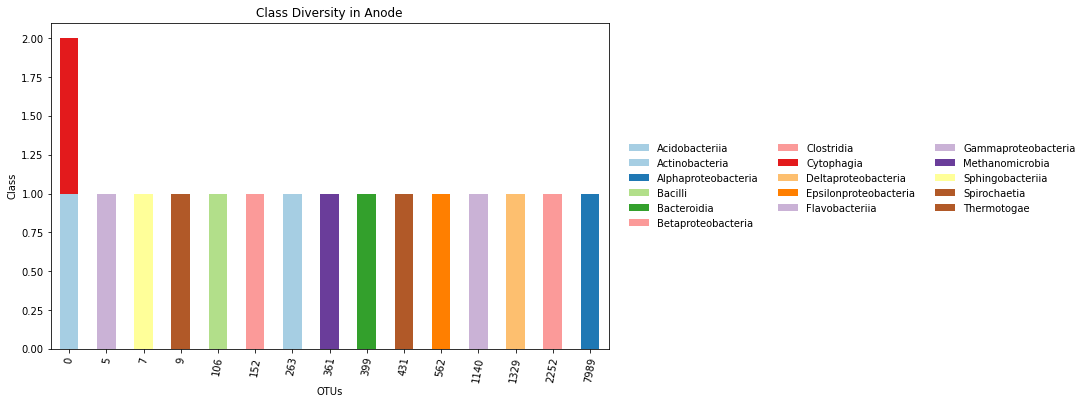

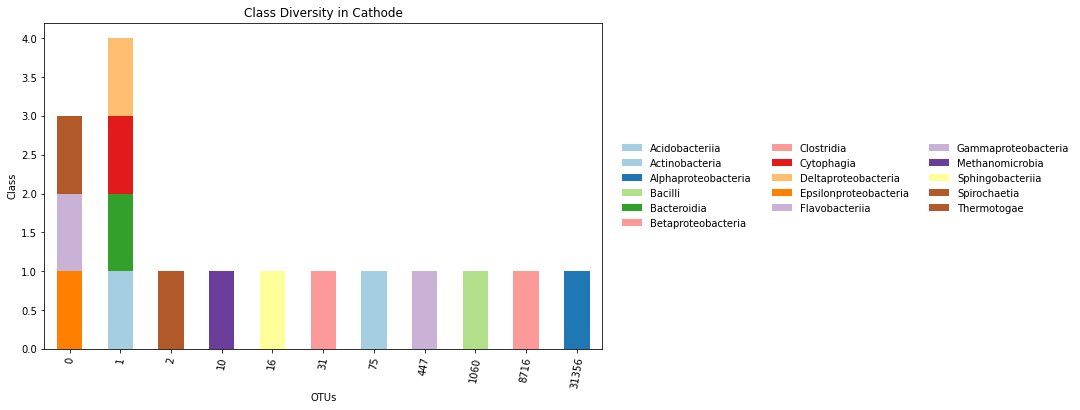

In [3]:
new_mdc = mdc.rename(columns={"index": "class", 0: "anode", 1: "cathode"})
new_mdc.head()
new_mdc.groupby(['anode', 'class']).size().unstack().plot(kind='bar',colormap='Paired', stacked=True, figsize=(10,6))
plt.legend(frameon=False, ncol=3, loc='center left', bbox_to_anchor=(1.02, 0.5))
plt.ylabel('Class')
plt.xlabel('OTUs')
plt.xticks(rotation=80)
plt.title('Class Diversity in Anode')
plt.show()
new_mdc.groupby(['cathode', 'class']).size().unstack().plot(kind='bar',colormap='Paired', stacked=True, figsize=(10,6))
plt.legend(frameon=False, ncol=3, loc='center left', bbox_to_anchor=(1.02, 0.5))
plt.ylabel('Class')
plt.xlabel('OTUs')
plt.xticks(rotation=80)
plt.title('Class Diversity in Cathode')
plt.show()

## Anode

In [3]:
mdc_anod = mdc.copy().drop(mdc.columns[[2]], axis=1)
new_df = mdc_anod[mdc_anod[0] > 100]
new_df.loc[len(new_df)] = ["Others", mdc_anod[mdc_anod[0] <= 100][0].sum()]
new_df

/home/mone/.local/lib/python3.6/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
/home/mone/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,index,0
1,Actinobacteria,263
2,Alphaproteobacteria,7989
3,Bacilli,106
4,Bacteroidia,399
5,Betaproteobacteria,2252
6,Clostridia,152
8,Deltaproteobacteria,1329
9,Epsilonproteobacteria,562
11,Others,21
12,Methanomicrobia,361


In [4]:
new_df_2=np.array(new_df)
new_df_2

array([['Actinobacteria', 263],
       ['Alphaproteobacteria', 7989],
       ['Bacilli', 106],
       ['Bacteroidia', 399],
       ['Betaproteobacteria', 2252],
       ['Clostridia', 152],
       ['Deltaproteobacteria', 1329],
       ['Epsilonproteobacteria', 562],
       ['Others', 21],
       ['Methanomicrobia', 361],
       ['Thermotogae', 431]], dtype=object)

In [5]:
order = []
anode = []
for item in new_df_2:
    order.append(item[0])
    anode.append(item[1])   

In [6]:
type(order), type(anode)

(list, list)

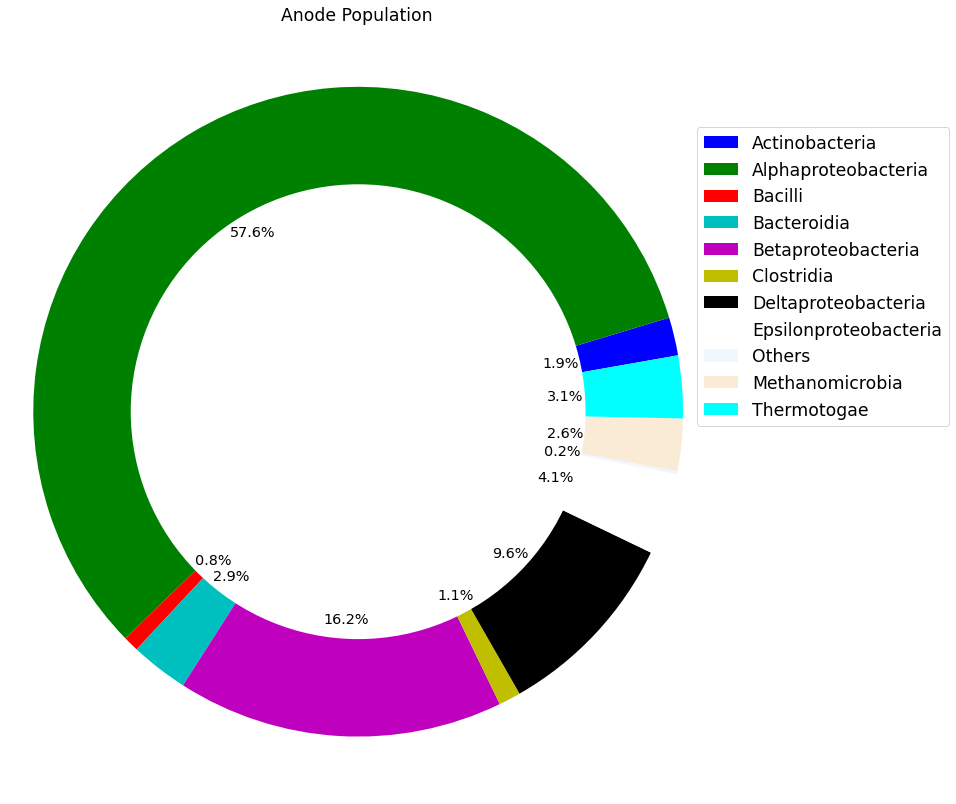

In [7]:
from __future__ import division
from matplotlib import colors as mcolors
labels = order[0:33]
sizes = anode[0:33]
colors = dict(mcolors.BASE_COLORS, **mcolors.CSS4_COLORS)
fig1, ax1 = plt.subplots(figsize=(10,11))
patches, texts, autotexts = ax1.pie(sizes, colors=colors,autopct='%1.1f%%',
        labeldistance=1.04, pctdistance=0.64, shadow=False, startangle=10)

for t in texts:
    t.set_size('xx-large')
for t in autotexts:
    t.set_size('x-large')
    autotexts[0].set_color('k')

centre_circle = plt.Circle((0,0),0.7,fc='white')
fig = plt.gcf()
fig.patch.set_facecolor('xkcd:white')
fig.gca().add_artist(centre_circle)
ax1.axis('equal')  
plt.tight_layout()
#plt.title('Diversidade')
plt.legend(labels, bbox_to_anchor=(0.975,0.88),fontsize='xx-large', loc="upper left")
plt.title('Anode Population', fontsize='xx-large')
plt.savefig('genero_anode.png', dpi = 400)
plt.show()

## Cathode

In [8]:
mdc_cathod = mdc.copy().drop(mdc.columns[[1]], axis=1)
new_df2 = mdc_cathod[mdc_cathod[1] > 100]
new_df2.loc[len(new_df2)] = ["Others", mdc_cathod[mdc_cathod[1] <= 100][1].sum()]
new_df2

/home/mone/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,index,1
2,Alphaproteobacteria,31356
3,Bacilli,1060
5,Betaproteobacteria,8716
11,Gammaproteobacteria,447
4,Others,138


In [9]:
new_df_3=np.array(new_df2)
new_df_3

array([['Alphaproteobacteria', 31356],
       ['Bacilli', 1060],
       ['Betaproteobacteria', 8716],
       ['Gammaproteobacteria', 447],
       ['Others', 138]], dtype=object)

In [10]:
order2 = []
cathode = []
for item in new_df_3:
    order2.append(item[0])    
    cathode.append(item[1])

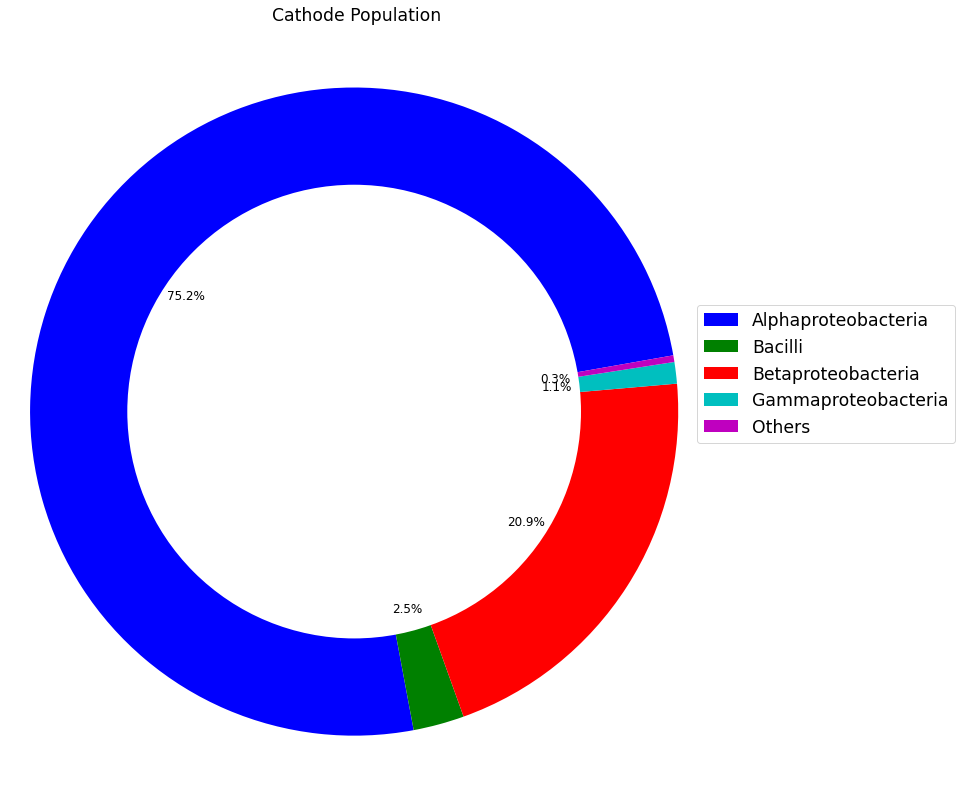

In [11]:
from __future__ import division
from matplotlib import colors as mcolors
labels = order2[0:70]
sizes = cathode[0:10]
colors = dict(mcolors.BASE_COLORS, **mcolors.CSS4_COLORS)
fig1, ax1 = plt.subplots(figsize=(10,11))
patches, texts, autotexts = ax1.pie(sizes,colors=colors,autopct='%1.1f%%',
        labeldistance=1.03, pctdistance=0.63, shadow=False, startangle=10)
for t in texts:
    t.set_size('xx-large')
for t in autotexts:
    t.set_size('large')
    autotexts[0].set_color('k')
centre_circle = plt.Circle((0,0),0.7,fc='white')
fig = plt.gcf()
fig.patch.set_facecolor('xkcd:white')
fig.gca().add_artist(centre_circle)
ax1.axis('equal')  
plt.tight_layout()
plt.title('Cathode Population', fontsize='xx-large')
plt.legend(labels, bbox_to_anchor=(0.975,0.65),fontsize='xx-large', loc="upper left")
plt.savefig('filo_cathode.png', dpi = 400)
plt.show()